## Seattle AirBnb Analyis

Analyis of Seattle AirBnb Dataset, in order to find what influences prices, reviews, etc.

In [18]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [19]:
df = pd.read_csv('./archive/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Q1. What parameters influence the price at an AirBnb?

Ideas to consider: bedrooms, bathrooms, property type, room type,  
Attempt to predict the price of a listing using these parameters.

In [74]:
influence_df = df[['bedrooms', 'bathrooms', 'room_type', 'accommodates','price']]

In [75]:
influence_df.head()

,bedrooms,bathrooms,room_type,accommodates,price
0,1.0,1.0,Entire home/apt,4,$85.00
1,1.0,1.0,Entire home/apt,4,$150.00
2,5.0,4.5,Entire home/apt,11,$975.00
3,0.0,1.0,Entire home/apt,3,$100.00
4,3.0,2.0,Entire home/apt,6,$450.00


Check if there are any missing values

In [84]:
np.sum(influence_df.isnull())

bedrooms         6
bathrooms       16
room_type        0
accommodates     0
price            0
dtype: int64

There are 6 missing values for "bedrooms" column and 16 missing values for "bathrooms" column. We need to check the details for the rows with missing values.

In [89]:
influence_df[influence_df['bedrooms'].isnull()]

,bedrooms,bathrooms,room_type,accommodates,price
1429,NaN,1.0,Entire home/apt,2,$80.00
1492,NaN,1.0,Entire home/apt,6,$200.00
1493,NaN,1.0,Entire home/apt,4,$132.00
1853,NaN,1.0,Entire home/apt,2,$95.00
2619,NaN,1.0,Entire home/apt,2,$99.00
2915,NaN,1.0,Entire home/apt,2,$75.00


In [90]:
influence_df[influence_df['bathrooms'].isnull()]

,bedrooms,bathrooms,room_type,accommodates,price
1242,1.0,NaN,Entire home/apt,4,$107.00
1314,1.0,NaN,Entire home/apt,4,$135.00
1357,2.0,NaN,Entire home/apt,6,$186.00
1378,1.0,NaN,Entire home/apt,4,$149.00
1961,1.0,NaN,Private room,4,$280.00
1975,1.0,NaN,Private room,1,$62.00
2048,2.0,NaN,Entire home/apt,4,$150.00
2096,1.0,NaN,Private room,2,$75.00
2306,1.0,NaN,Entire home/apt,3,$105.00
2408,1.0,NaN,Private room,2,$60.00


Since, the rest of the columns have data, we cannot simply drop the rows. We need to impute data for the missing values. Luckily, we can use the mode for both cases, since most AirBnb's come with 1 'bathroom' and 'bedroom'.

In [95]:
fill_mode = lambda col: col.fillna(col.mode()[0], inplace=True)

In [97]:
influence_df.apply(fill_mode, axis=0)

bedrooms        None
bathrooms       None
room_type       None
accommodates    None
price           None
dtype: object

In [99]:
np.sum(influence_df.isnull())

bedrooms        0
bathrooms       0
room_type       0
accommodates    0
price           0
dtype: int64

Fixed missing values.

Now, make dummy columns for "room_type", and append it to influence_df as well as drop "room_type" column

In [101]:
dummy_columns = pd.get_dummies(influence_df['room_type'])

In [107]:
influence_df = pd.concat([influence_df, dummy_columns], axis=1)

In [111]:
influence_df = influence_df.drop('room_type', axis=1)

In [112]:
influence_df.head()

,bedrooms,bathrooms,accommodates,price,Entire home/apt,Private room,Shared room
0,1.0,1.0,4,$85.00,1,0,0
1,1.0,1.0,4,$150.00,1,0,0
2,5.0,4.5,11,$975.00,1,0,0
3,0.0,1.0,3,$100.00,1,0,0
4,3.0,2.0,6,$450.00,1,0,0


Since, the price is a string, we need to change to to a float, in order to do any sort of prediction with it.

In [126]:
def makeNum(string):
    number = string.split('$')[1]
    number = number.replace(',', '')
    return float(number)

In [136]:
price_fixed= influence_df['price'].map(makeNum)

In [141]:
influence_df = influence_df.drop('price', axis=1)

In [142]:
influence_df = pd.concat([influence_df, price_fixed], axis=1)

In [143]:
influence_df.head()

,bedrooms,bathrooms,accommodates,Entire home/apt,Private room,Shared room,price
0,1.0,1.0,4,1,0,0,85.0
1,1.0,1.0,4,1,0,0,150.0
2,5.0,4.5,11,1,0,0,975.0
3,0.0,1.0,3,1,0,0,100.0
4,3.0,2.0,6,1,0,0,450.0


<AxesSubplot:>

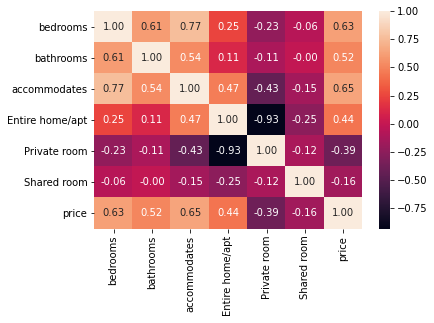

In [144]:
sns.heatmap(influence_df.corr(), annot=True, fmt='.2f')